In [322]:
import findspark
findspark.init()
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [333]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [334]:
k = 4

In [335]:
import numpy as np

centroids = np.array([X[0],X[1],X[3],X[4]], dtype = float)

In [336]:
row, col = X.shape

In [337]:
clusterAssigned = np.zeros(shape = (row, k), dtype = float)

In [338]:
def normDist(x1, x2):
    dist = np.linalg.norm(x1 - x2)
    return dist

In [339]:
def cluster(x, y, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, col), dtype=float)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        #################################
        ### changed for the homework #### 
        print("iter {} Centroids =\n{}".format(iter, centroids))
        ### changed for the homework #### 
        #################################
        for i in range(row):
            minDist = np.inf  
            minIndex = -1 
            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist] 
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        comparison = np.equal(centroids, _centroids)
        
        #################################
        #################################
        ### changed for the homework #### 
        correction = np.zeros(shape = (row, 1), dtype = bool)
        relation = np.zeros(shape = (k, 1), dtype = int)
        
        # y에 할당된 클러스터 넘버링과 clusterAssigned의 넘버링이 서로 다르므로 이를 보정함.
        for i in range(k):
            temp = np.zeros(shape = (k, 1), dtype = int)
            for j in range(y.shape[0]):
                if i==y[j]:
                    cluster = int(clusterAssigned[j][0])
                temp[cluster] += 1
            relation[i] = np.argmax(temp)
            
        # 보정된 배열(relation)을 바탕으로 클러스터가 동일하게 배정되었는지 확인함.
        for blob in range(y.shape[0]):
            correction[blob] = (clusterAssigned[blob][0] == relation[y[blob]])
        if False in correction:
            cnt = 0
            for i in range(len(correction)):
                if correction[i] == False:
                    cnt += 1
            print("not correctly assigned : {} \n".format(cnt))
        else :
            print("all correctly assigned \n")
        ### changed for the homework #### 
        #################################
        #################################
            
        if(comparison.all() == True):
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            centroids = _centroids
            iter += 1

In [340]:
centroids, clusterAssigned = cluster(X, y, k, centroids)

iter 1 Centroids =
[[ 0.669787    3.59540802]
 [-2.02396992  7.99569054]
 [ 1.06923853  4.53068484]
 [ 1.71444449  5.02521524]]
not correctly assigned : 10 

iter 2 Centroids =
[[ 0.32236346  2.26329365]
 [-1.27208964  7.74944718]
 [ 0.78452776  4.5486942 ]
 [ 1.82769987  4.7971034 ]]
not correctly assigned : 10 

iter 3 Centroids =
[[ 0.40318663  1.92930913]
 [-1.27208964  7.74944718]
 [ 0.32268897  4.29359399]
 [ 1.85082304  4.43985409]]
not correctly assigned : 19 

iter 4 Centroids =
[[ 0.97564659  1.43530916]
 [-1.27208964  7.74944718]
 [-0.41097869  3.93110351]
 [ 1.57982688  4.39215911]]
not correctly assigned : 8 

iter 5 Centroids =
[[ 1.97918933  0.97920012]
 [-1.27208964  7.74944718]
 [-1.0671867   3.41638534]
 [ 1.25665654  4.37698484]]
not correctly assigned : 1 

iter 6 Centroids =
[[ 1.97918933  0.97920012]
 [-1.27208964  7.74944718]
 [-1.43468106  3.216216  ]
 [ 0.97698781  4.3136601 ]]
not correctly assigned : 1 

iter 7 Centroids =
[[ 1.97918933  0.97920012]
 [-1.2720

#####※하나의 blob을 제외한 모든 blob이 정상적으로 클러스터링되었다.

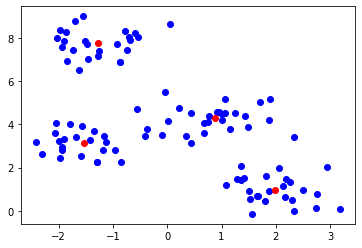

In [306]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],color='blue')
plt.scatter(centroids[:,0],centroids[:,1],color='red')